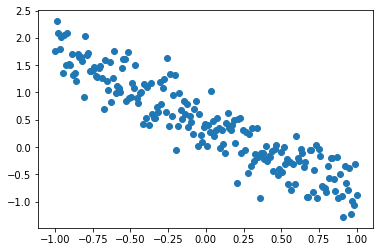

In [290]:
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
from numpy.linalg import inv 

import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt from scipy.spatial.distance

# create multivariate distribution
# generate points along axis
x = np.linspace(-1,1,200)
y_axis = np.linspace(-1,1,200)
W = [-1.3,0.5]
eps = np.random.normal(0,0.3,[200,1])
y_results = W[0]*x + W[1] 
for i in range(len(y_results)):
    y_results[i] = y_results[i] + eps[i]


# print(y)

plt.scatter(x,y_results)

plt.show()

2


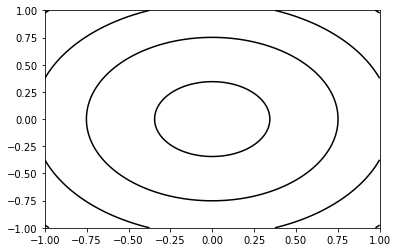

In [291]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

mu = np.array([0,0])
print(mu.size)
cov = np.eye(2)

# create multivariate distribution
pdf = multivariate_normal(mu,cov) # generate points along axis

x = np.linspace(-1,1,200)
y = np.linspace(-1,1,200)

x1p,x2p = np.meshgrid(x,y)
pos = np.vstack((x1p.flatten(),x2p.flatten()))
pos = pos.T

# evaluate pdf at points
Z = pdf.pdf(pos)
Z = Z.reshape(200,200)

fig = plt.figure()
ax = fig.gca()
pdf_c = ax.contour(x1p,x2p,Z,3,colors='k')

plt.show();

In [313]:
def nDataModel(n):
    randomIndex = []
    X = np.ones((n,2))
    
    Y = np.ones(n)
    
    for i in range(0,n):
        
        X[i,0] = x[i]
        
        Y[i] = y_results[i]
    
    
    m_0 = mu
    s_0 = cov

    #print(Y)
    
    beta = 0.3
    s_n = inv(inv(s_0) + beta*np.matmul(X.T,X))

    m_n = np.matmul(s_n,((np.matmul(inv(s_0),m_0))+beta * np.matmul(X.T,Y)))
    
    posterior = multivariate_normal(m_n,s_n)


    Z1 = posterior.pdf(pos)
    Z1 = Z1.reshape(200,200)

    plt.contour(x1p,x2p,Z1,3,colors='red')
    plt.show()
    return (m_n, s_n)
       

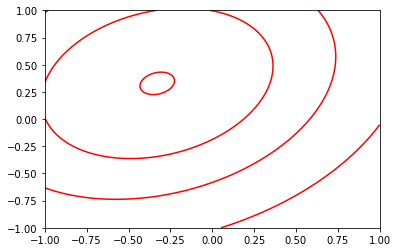

In [314]:
#posterior for 1 random point

m_n_1, s_n_1  = nDataModel(1)




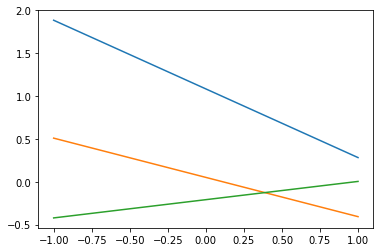

In [315]:

#samples from the 1 point posterior
def sample_n_points(m_n, s_n, n):
    lines =[]
    sample = np.random.multivariate_normal(m_n,s_n,n)
    

   
    
    for i in range(0,n):
        lines.append(sample[i][0]*x + sample[i][1])
        plt.plot(x, lines[i])
        
        
    
    

    

    plt.show();


    
    
        
sample_n_points(m_n_1,s_n_1,3)        
    
    
    

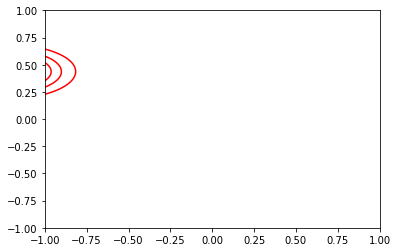

[-1.24878737  0.43505115]


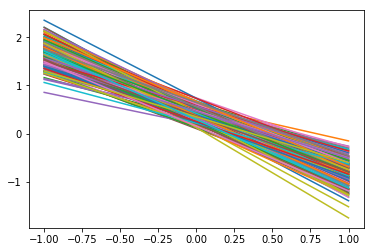

In [316]:
m_n_100, s_n_100 = nDataModel(199)


sample_n_points(m_n_100,s_n_100,200)